In [1]:
#American Airlines

In [2]:
#Dependencies 
%matplotlib notebook
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import sem
from scipy.stats import linregress
import warnings 
warnings.filterwarnings('ignore')

In [3]:
# Read in csv
csv_path_2= "LGA-American.csv"

american_lga_df=pd.read_csv(csv_path_2, header=7)

american_lga_df.head()

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Destination Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,AA,1/1/2017,157.0,N3HUAA,DFW,6:00,6:08,253.0,232.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AA,1/1/2017,289.0,N3AFAA,ORD,7:10,7:09,166.0,164.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AA,1/1/2017,303.0,N3KSAA,ORD,6:00,6:48,166.0,145.0,48.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AA,1/1/2017,325.0,N3LRAA,ORD,9:00,8:55,165.0,139.0,-5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AA,1/1/2017,328.0,N3FYAA,ORD,10:30,10:26,169.0,138.0,-4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Remove unnecessary columns
clean_american_lga_df=american_lga_df.drop(['Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20','Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25','Unnamed: 26','Unnamed: 27','Unnamed: 28', 'Unnamed: 29'], axis=1)
clean_american_lga_df

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Destination Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,AA,1/1/2017,157.0,N3HUAA,DFW,6:00,6:08,253.0,232.0,8.0,6:24,16.0,0.0,0.0,0.0,0.0,0.0
1,AA,1/1/2017,289.0,N3AFAA,ORD,7:10,7:09,166.0,164.0,-1.0,7:20,11.0,0.0,0.0,0.0,0.0,0.0
2,AA,1/1/2017,303.0,N3KSAA,ORD,6:00,6:48,166.0,145.0,48.0,7:01,13.0,27.0,0.0,0.0,0.0,0.0
3,AA,1/1/2017,325.0,N3LRAA,ORD,9:00,8:55,165.0,139.0,-5.0,9:13,18.0,0.0,0.0,0.0,0.0,0.0
4,AA,1/1/2017,328.0,N3FYAA,ORD,10:30,10:26,169.0,138.0,-4.0,10:37,11.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62273,AA,12/31/2018,2669.0,N335RT,MIA,13:30,13:55,200.0,176.0,25.0,14:13,18.0,0.0,0.0,0.0,0.0,0.0
62274,AA,12/31/2018,2809.0,N934NN,MIA,19:29,19:23,193.0,162.0,-6.0,19:33,10.0,0.0,0.0,0.0,0.0,0.0
62275,AA,12/31/2018,2830.0,N815NN,DFW,18:59,18:58,249.0,242.0,-1.0,19:11,13.0,0.0,0.0,0.0,0.0,0.0
62276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Create new Dataframe 
summary_american=clean_american_lga_df[["Carrier Code", "Date (MM/DD/YYYY)", "Destination Airport", 
                                        "Scheduled departure time", "Actual departure time", 
                                        "Departure delay (Minutes)", "Delay Carrier (Minutes)", 
                                        "Delay Weather (Minutes)", "Delay National Aviation System (Minutes)",
                                        "Delay Security (Minutes)", "Delay Late Aircraft Arrival (Minutes)"]] 
summary_american

,Carrier Code,Date (MM/DD/YYYY),Destination Airport,Scheduled departure time,Actual departure time,Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,AA,1/1/2017,DFW,6:00,6:08,8.0,0.0,0.0,0.0,0.0,0.0
1,AA,1/1/2017,ORD,7:10,7:09,-1.0,0.0,0.0,0.0,0.0,0.0
2,AA,1/1/2017,ORD,6:00,6:48,48.0,27.0,0.0,0.0,0.0,0.0
3,AA,1/1/2017,ORD,9:00,8:55,-5.0,0.0,0.0,0.0,0.0,0.0
4,AA,1/1/2017,ORD,10:30,10:26,-4.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
62273,AA,12/31/2018,MIA,13:30,13:55,25.0,0.0,0.0,0.0,0.0,0.0
62274,AA,12/31/2018,MIA,19:29,19:23,-6.0,0.0,0.0,0.0,0.0,0.0
62275,AA,12/31/2018,DFW,18:59,18:58,-1.0,0.0,0.0,0.0,0.0,0.0
62276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Drop NaN values 
lga_summary_american=summary_american.dropna()
lga_summary_american

,Carrier Code,Date (MM/DD/YYYY),Destination Airport,Scheduled departure time,Actual departure time,Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,AA,1/1/2017,DFW,6:00,6:08,8.0,0.0,0.0,0.0,0.0,0.0
1,AA,1/1/2017,ORD,7:10,7:09,-1.0,0.0,0.0,0.0,0.0,0.0
2,AA,1/1/2017,ORD,6:00,6:48,48.0,27.0,0.0,0.0,0.0,0.0
3,AA,1/1/2017,ORD,9:00,8:55,-5.0,0.0,0.0,0.0,0.0,0.0
4,AA,1/1/2017,ORD,10:30,10:26,-4.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
62271,AA,12/31/2018,DFW,6:59,6:54,-5.0,0.0,0.0,0.0,0.0,0.0
62272,AA,12/31/2018,MCO,6:29,6:23,-6.0,0.0,0.0,0.0,0.0,0.0
62273,AA,12/31/2018,MIA,13:30,13:55,25.0,0.0,0.0,0.0,0.0,0.0
62274,AA,12/31/2018,MIA,19:29,19:23,-6.0,0.0,0.0,0.0,0.0,0.0


In [7]:
lga_summary_american.count()

Carrier Code                                62276
Date (MM/DD/YYYY)                           62276
Destination Airport                         62276
Scheduled departure time                    62276
Actual departure time                       62276
Departure delay (Minutes)                   62276
Delay Carrier (Minutes)                     62276
Delay Weather (Minutes)                     62276
Delay National Aviation System (Minutes)    62276
Delay Security (Minutes)                    62276
Delay Late Aircraft Arrival (Minutes)       62276
dtype: int64

In [8]:
lga_summary_american_date=lga_summary_american.groupby(['Date (MM/DD/YYYY)'], as_index=False).agg({'Departure delay (Minutes)':'sum'})
lga_summary_american_date

,Date (MM/DD/YYYY),Departure delay (Minutes)
0,1/1/2017,388.0
1,1/1/2018,1517.0
2,1/1/2019,-6.0
3,1/10/2017,1073.0
4,1/10/2018,1008.0
...,...,...
998,9/8/2018,356.0
999,9/8/2019,387.0
1000,9/9/2017,-144.0
1001,9/9/2018,-83.0


In [9]:
american_date_delay_df=pd.DataFrame(lga_summary_american_date)

In [10]:
american_date_delay_df['Date']=pd.to_datetime(american_date_delay_df['Date (MM/DD/YYYY)'])

In [11]:
american_date_delay_unsort=american_date_delay_df.drop(['Date (MM/DD/YYYY)'], axis=1)

In [12]:
american_date_delay_sort=american_date_delay_unsort.sort_values(by=['Departure delay (Minutes)'], ascending=False)
american_date_delay_sort

,Departure delay (Minutes),Date
887,5534.0,2018-08-03
488,5106.0,2018-04-02
225,5004.0,2017-12-14
622,4889.0,2017-05-05
168,4828.0,2018-11-15
...,...,...
545,-347.0,2018-05-01
97,-362.0,2017-10-11
442,-362.0,2017-03-06
292,-383.0,2017-02-14


In [13]:
final_american_date=american_date_delay_sort.head(20)

In [14]:
date=american_date_delay_sort.head(1)

In [15]:
date.iloc[0]['Date']

Timestamp('2018-08-03 00:00:00')

In [16]:
x_axis=np.arange(len(final_american_date))
tick_location=[value for value in x_axis]
y_axis=final_american_date['Departure delay (Minutes)']

([<matplotlib.axis.XTick at 0x1a21d00c90>,
 <a list of 20 Text xticklabel objects>)

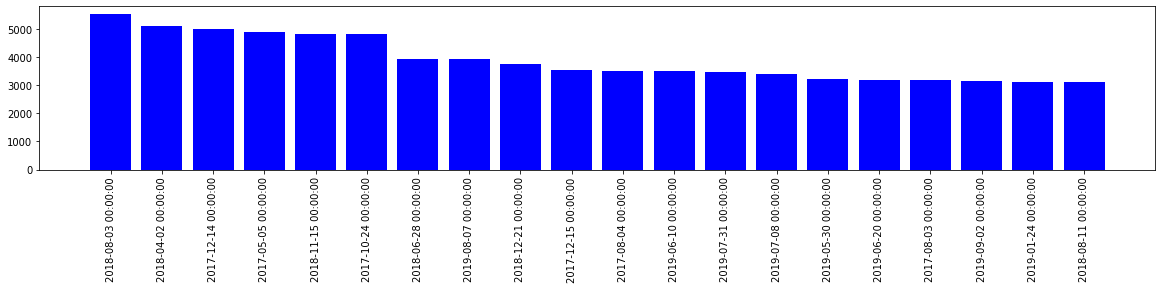

In [17]:
plt.figure(figsize=(20,3))
plt.bar(x_axis, y_axis, color='b', alpha=1, align='center')
plt.xticks(tick_location, final_american_date['Date'], rotation='vertical')

In [18]:
lga_american_check_reason=lga_summary_american.groupby(['Date (MM/DD/YYYY)'],as_index=False).sum()

In [19]:
lga_american_check_reason['Date']=pd.to_datetime(lga_american_check_reason['Date (MM/DD/YYYY)'])
lga_american_check_reason

,Date (MM/DD/YYYY),Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Date
0,1/1/2017,388.0,490.0,0.0,53.0,0.0,0.0,2017-01-01
1,1/1/2018,1517.0,873.0,0.0,314.0,0.0,241.0,2018-01-01
2,1/1/2019,-6.0,36.0,0.0,76.0,0.0,140.0,2019-01-01
3,1/10/2017,1073.0,242.0,0.0,441.0,0.0,482.0,2017-01-10
4,1/10/2018,1008.0,843.0,0.0,90.0,0.0,330.0,2018-01-10
...,...,...,...,...,...,...,...,...
998,9/8/2018,356.0,215.0,0.0,0.0,0.0,267.0,2018-09-08
999,9/8/2019,387.0,76.0,0.0,0.0,0.0,494.0,2019-09-08
1000,9/9/2017,-144.0,0.0,0.0,0.0,0.0,0.0,2017-09-09
1001,9/9/2018,-83.0,6.0,0.0,109.0,0.0,169.0,2018-09-09


In [20]:
lga_american_check_reason_1=lga_american_check_reason.loc[lga_american_check_reason["Date"]==date.iloc[0]['Date']]
lga_american_check_reason_1

,Date (MM/DD/YYYY),Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Date
887,8/3/2018,5534.0,592.0,906.0,247.0,0.0,3748.0,2018-08-03


In [21]:
 lga_american_check_reason_1.iloc[0][0]

'8/3/2018'

In [22]:
d=lga_american_check_reason_1.iloc[0].count()

In [23]:
lga_american_check_reason_1.columns[5].split(" ")[0]

'Delay'

In [24]:
value=[]
heading=[]

In [25]:
for i in range(d-1):
    if lga_american_check_reason_1.columns[i].split(" ")[0]== "Delay":
        print(lga_american_check_reason_1.columns[i])
        value.append(lga_american_check_reason_1.iloc[0][i])
        heading.append(lga_american_check_reason_1.columns[i])

Delay Carrier (Minutes)
Delay Weather (Minutes)
Delay National Aviation System (Minutes)
Delay Security (Minutes)
Delay Late Aircraft Arrival (Minutes)


In [26]:
max(value)

3748.0

In [27]:
value.index(max(value))

4

In [28]:
reason=heading[value.index(max(value))]

In [29]:
print("Reason for delay is {}".format(reason))

Reason for delay is Delay Late Aircraft Arrival (Minutes)


Text(0.5, 1.0, 'Date 2018-08-03, main reason for delay is Late')

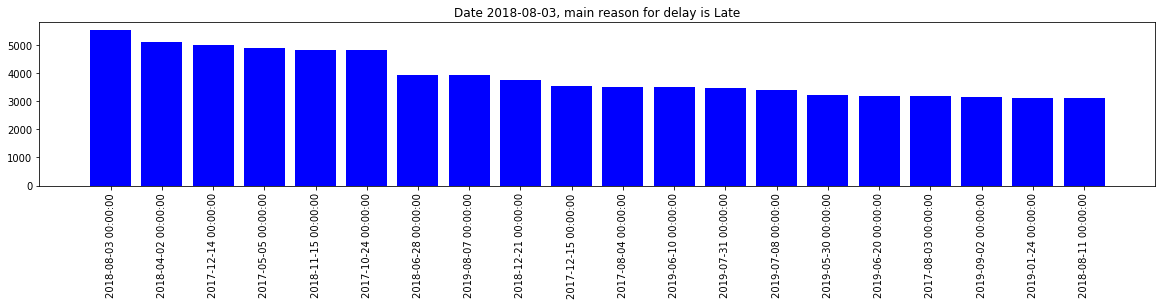

In [30]:
plt.figure(figsize=(20,3))
plt.bar(x_axis, y_axis, color='b', alpha=1, align="center")
plt.xticks(tick_location, final_american_date['Date'], rotation="vertical")
plt.title("Date {}, main reason for delay is {}".format(str(date.iloc[0]['Date']).split(" ")[0], reason.split(" ")[1]))

In [31]:
date1=american_date_delay_sort.head(3)
date1

,Departure delay (Minutes),Date
887,5534.0,2018-08-03
488,5106.0,2018-04-02
225,5004.0,2017-12-14


In [32]:
lga_american_check_reason_1=lga_american_check_reason.loc[lga_american_check_reason["Date"]==date1.iloc[2]['Date']]
lga_american_check_reason_1

,Date (MM/DD/YYYY),Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Date
225,12/14/2017,5004.0,0.0,1933.0,1300.0,0.0,2813.0,2017-12-14


In [33]:
#Group by Date & Destination Airport

In [34]:
lga_american_dest=lga_summary_american.groupby(['Date (MM/DD/YYYY)', 'Destination Airport'], as_index=False).agg({'Departure delay (Minutes)': 'sum'})

In [35]:
date_destination_delay=pd.DataFrame(lga_american_dest)
date_destination_delay

,Date (MM/DD/YYYY),Destination Airport,Departure delay (Minutes)
0,1/1/2017,ATL,-5.0
1,1/1/2017,BOS,-16.0
2,1/1/2017,CLT,392.0
3,1/1/2017,DCA,-4.0
4,1/1/2017,DFW,-30.0
...,...,...,...
9264,9/9/2019,MIA,-22.0
9265,9/9/2019,ORD,173.0
9266,9/9/2019,PHL,-20.0
9267,9/9/2019,PIT,-10.0


In [36]:
date_destination_delay['Date']=pd.to_datetime(date_destination_delay['Date (MM/DD/YYYY)'])
date_destination_delay

,Date (MM/DD/YYYY),Destination Airport,Departure delay (Minutes),Date
0,1/1/2017,ATL,-5.0,2017-01-01
1,1/1/2017,BOS,-16.0,2017-01-01
2,1/1/2017,CLT,392.0,2017-01-01
3,1/1/2017,DCA,-4.0,2017-01-01
4,1/1/2017,DFW,-30.0,2017-01-01
...,...,...,...,...
9264,9/9/2019,MIA,-22.0,2019-09-09
9265,9/9/2019,ORD,173.0,2019-09-09
9266,9/9/2019,PHL,-20.0,2019-09-09
9267,9/9/2019,PIT,-10.0,2019-09-09


In [37]:
date_destination_delay_unsort=date_destination_delay.drop(['Date (MM/DD/YYYY)'], axis=1)
date_destination_delay_unsort

,Destination Airport,Departure delay (Minutes),Date
0,ATL,-5.0,2017-01-01
1,BOS,-16.0,2017-01-01
2,CLT,392.0,2017-01-01
3,DCA,-4.0,2017-01-01
4,DFW,-30.0,2017-01-01
...,...,...,...
9264,MIA,-22.0,2019-09-09
9265,ORD,173.0,2019-09-09
9266,PHL,-20.0,2019-09-09
9267,PIT,-10.0,2019-09-09


In [38]:
date_destination_delay_sort=date_destination_delay_unsort.sort_values(by=['Departure delay (Minutes)'], ascending=False)

In [39]:
date_destination_delay_sort_plot=date_destination_delay_sort.head(10)

In [40]:
lga_check_dest_reason=lga_summary_american.groupby(['Date (MM/DD/YYYY)', 'Destination Airport'], as_index=False).sum()

In [41]:
lga_check_dest_reason['Date']=pd.to_datetime(lga_check_dest_reason['Date (MM/DD/YYYY)'])
lga_check_dest_reason

,Date (MM/DD/YYYY),Destination Airport,Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Date
0,1/1/2017,ATL,-5.0,0.0,0.0,0.0,0.0,0.0,2017-01-01
1,1/1/2017,BOS,-16.0,0.0,0.0,0.0,0.0,0.0,2017-01-01
2,1/1/2017,CLT,392.0,388.0,0.0,36.0,0.0,0.0,2017-01-01
3,1/1/2017,DCA,-4.0,0.0,0.0,0.0,0.0,0.0,2017-01-01
4,1/1/2017,DFW,-30.0,0.0,0.0,17.0,0.0,0.0,2017-01-01
...,...,...,...,...,...,...,...,...,...
9264,9/9/2019,MIA,-22.0,0.0,0.0,0.0,0.0,0.0,2019-09-09
9265,9/9/2019,ORD,173.0,0.0,0.0,46.0,0.0,211.0,2019-09-09
9266,9/9/2019,PHL,-20.0,0.0,0.0,0.0,0.0,0.0,2019-09-09
9267,9/9/2019,PIT,-10.0,0.0,0.0,0.0,0.0,0.0,2019-09-09


In [42]:
date1=date_destination_delay_sort.head(3)

In [43]:
date1.iloc[0]['Destination Airport']

'ORD'

In [44]:
lga_check_dest_reason_1=lga_check_dest_reason.loc[(lga_check_dest_reason['Destination Airport']==date1.iloc[0]['Destination Airport'])]                               


In [45]:
lga_check_dest_reason_1=lga_check_dest_reason_1[lga_check_dest_reason['Date']==date1.iloc[0]['Date']]
lga_check_dest_reason_1

,Date (MM/DD/YYYY),Destination Airport,Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Date
1529,11/15/2018,ORD,2213.0,26.0,396.0,77.0,0.0,1698.0,2018-11-15


In [46]:
d=lga_check_dest_reason_1.iloc[0].count()
d

9

In [47]:
value_dest=[]
heading_dest=[]

for i in range(d-1):
    if lga_check_dest_reason_1.columns[i].split(" ")[0]== "Delay":
        print(lga_check_dest_reason_1.columns[i])
        value_dest.append(lga_check_dest_reason_1.iloc[0][i])
        heading_dest.append(lga_check_dest_reason_1.columns[i])

Delay Carrier (Minutes)
Delay Weather (Minutes)
Delay National Aviation System (Minutes)
Delay Security (Minutes)
Delay Late Aircraft Arrival (Minutes)


In [48]:
value_dest

[26.0, 396.0, 77.0, 0.0, 1698.0]

In [49]:
heading_dest

['Delay Carrier (Minutes)',
 'Delay Weather (Minutes)',
 'Delay National Aviation System (Minutes)',
 'Delay Security (Minutes)',
 'Delay Late Aircraft Arrival (Minutes)']

In [50]:
max(value_dest)

1698.0

In [51]:
reason_dest=heading_dest[value_dest.index(max(value_dest))]

In [52]:
reason_dest

'Delay Late Aircraft Arrival (Minutes)'

In [53]:
x_axis=np.arange(len(date_destination_delay_sort_plot))
tick_location=[value for value in x_axis]
y_axis=date_destination_delay_sort_plot['Departure delay (Minutes)']

Text(0.5, 1.0, 'Date 2018-11-15, main reason for delay is Late')

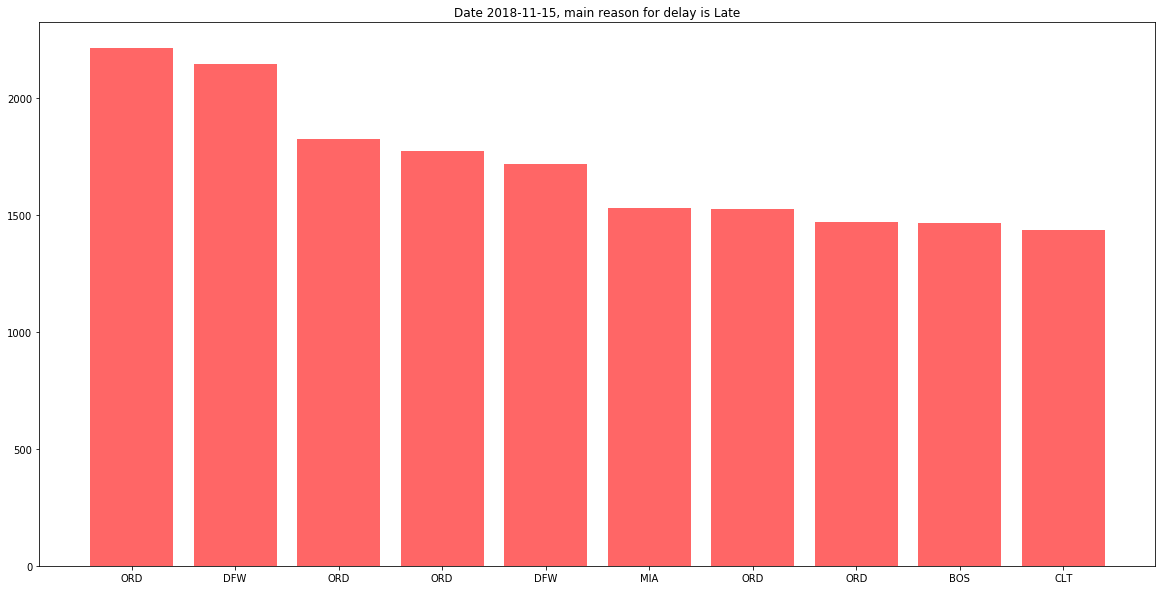

In [54]:
plt.figure(figsize=(20,10))
plt.bar(x_axis, y_axis, color='r', alpha=0.6, align="center")
plt.xticks(tick_location, date_destination_delay_sort_plot['Destination Airport'])
plt.title("Date {}, main reason for delay is {}".format(str(date1.iloc[0]['Date']).split(" ")[0], reason_dest.split(" ")[1]))

In [60]:
# Set data
x_axis = lga_summary_american['Departure delay (Minutes)']
print(x_axis)
y_axis = lga_summary_american['Delay Weather (Minutes)']

0         8.0
1        -1.0
2        48.0
3        -5.0
4        -4.0
         ... 
62271    -5.0
62272    -6.0
62273    25.0
62274    -6.0
62275    -1.0
Name: Departure delay (Minutes), Length: 62276, dtype: float64


In [61]:
# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

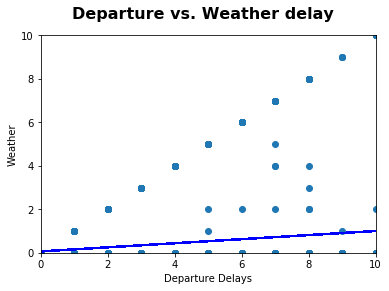

In [63]:
# Plot data
fig, ax = plt.subplots()

fig.suptitle("Departure vs. Weather delay", fontsize=16, fontweight="bold")

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

ax.set_xlabel("Departure Delays")
ax.set_ylabel("Weather")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.show()

In [64]:
# Set data
x_axis = lga_summary_american['Departure delay (Minutes)']
print(x_axis)
y_axis = lga_summary_american['Delay Carrier (Minutes)']

0         8.0
1        -1.0
2        48.0
3        -5.0
4        -4.0
         ... 
62271    -5.0
62272    -6.0
62273    25.0
62274    -6.0
62275    -1.0
Name: Departure delay (Minutes), Length: 62276, dtype: float64


In [65]:
# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

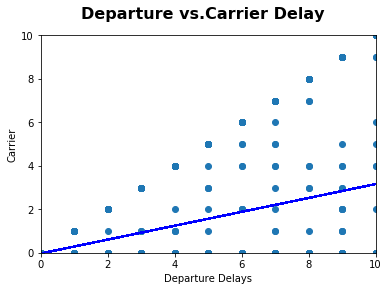

In [66]:
# Plot data
fig, ax = plt.subplots()

fig.suptitle("Departure vs.Carrier Delay", fontsize=16, fontweight="bold")

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

ax.set_xlabel("Departure Delays")
ax.set_ylabel("Carrier")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.show()

In [71]:
# Set data
x_axis = lga_summary_american['Departure delay (Minutes)']
print(x_axis)
y_axis = lga_summary_american['Delay National Aviation System (Minutes)']

0         8.0
1        -1.0
2        48.0
3        -5.0
4        -4.0
         ... 
62271    -5.0
62272    -6.0
62273    25.0
62274    -6.0
62275    -1.0
Name: Departure delay (Minutes), Length: 62276, dtype: float64


In [72]:
# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

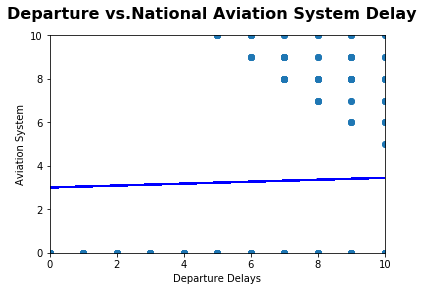

In [73]:
# Plot data
fig, ax = plt.subplots()

fig.suptitle("Departure vs.National Aviation System Delay", fontsize=16, fontweight="bold")

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

ax.set_xlabel("Departure Delays")
ax.set_ylabel("Aviation System")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.show()

In [75]:
# Set data
x_axis = lga_summary_american['Departure delay (Minutes)']
print(x_axis)
y_axis = lga_summary_american['Delay Security (Minutes)']

0         8.0
1        -1.0
2        48.0
3        -5.0
4        -4.0
         ... 
62271    -5.0
62272    -6.0
62273    25.0
62274    -6.0
62275    -1.0
Name: Departure delay (Minutes), Length: 62276, dtype: float64


In [76]:
# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

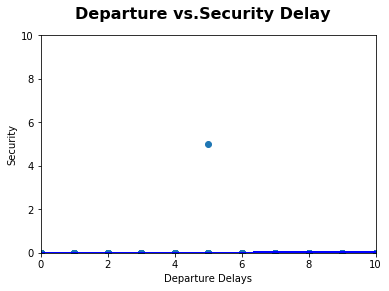

In [77]:
# Plot data
fig, ax = plt.subplots()

fig.suptitle("Departure vs.Security Delay", fontsize=16, fontweight="bold")

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

ax.set_xlabel("Departure Delays")
ax.set_ylabel("Security")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.show()

In [78]:
# Set data
x_axis = lga_summary_american['Departure delay (Minutes)']
print(x_axis)
y_axis = lga_summary_american['Delay Late Aircraft Arrival (Minutes)']

0         8.0
1        -1.0
2        48.0
3        -5.0
4        -4.0
         ... 
62271    -5.0
62272    -6.0
62273    25.0
62274    -6.0
62275    -1.0
Name: Departure delay (Minutes), Length: 62276, dtype: float64


In [79]:
# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

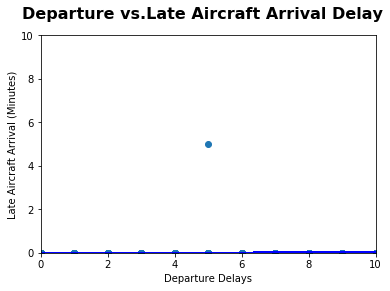

In [80]:
# Plot data
fig, ax = plt.subplots()

fig.suptitle("Departure vs.Late Aircraft Arrival Delay", fontsize=16, fontweight="bold")

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

ax.set_xlabel("Departure Delays")
ax.set_ylabel("Late Aircraft Arrival (Minutes)")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.show()

In [83]:
lga_american_check_reason.to_csv("lga_american_date",index=False)

In [84]:
lga_check_dest_reason.to_csv("lga_american_dest", index=False)